#Multiple Linear Regression Model
##*for Determining Highway mileage*

##Load the dataset

In [4]:
import pandas as pd
df = pd.read_csv('cars.csv')
df.head()


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


##Distiguishing Numerical and Categorical Values

In [5]:
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
numerical_vars = df.select_dtypes(include=['number']).columns

print("Categorical Variables:", list(categorical_vars))
print("Numerical Variables:", list(numerical_vars))

Categorical Variables: ['Engine Information.Driveline', 'Engine Information.Engine Type', 'Engine Information.Transmission', 'Fuel Information.Fuel Type', 'Identification.Classification', 'Identification.ID', 'Identification.Make', 'Identification.Model Year']
Numerical Variables: ['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width', 'Engine Information.Number of Forward Gears', 'Fuel Information.City mpg', 'Fuel Information.Highway mpg', 'Identification.Year', 'Engine Information.Engine Statistics.Horsepower', 'Engine Information.Engine Statistics.Torque']


##Total Dimension

In [6]:
rows, columns = df.shape

print(f"Number of Rows: {rows}")
print(f"Number of Columns: {columns}")

Number of Rows: 5076
Number of Columns: 18


##No. of Instances

In [7]:
num_instances = df.shape[0]

print(f"Number of Instances (Observations): {num_instances}")


Number of Instances (Observations): 5076


##Identifying Missing Values

In [8]:
missing_values = df.isnull().sum()

# Display missing values per column
print("Missing values in each column:\n")
print(missing_values)

# Total number of missing values
total_missing = missing_values.sum()
print(f"\nTotal Missing Values in Dataset: {total_missing}")

Missing values in each column:

Dimensions.Height                                  0
Dimensions.Length                                  0
Dimensions.Width                                   0
Engine Information.Driveline                       0
Engine Information.Engine Type                     0
Engine Information.Hybrid                          0
Engine Information.Number of Forward Gears         0
Engine Information.Transmission                    0
Fuel Information.City mpg                          0
Fuel Information.Fuel Type                         0
Fuel Information.Highway mpg                       0
Identification.Classification                      0
Identification.ID                                  0
Identification.Make                                0
Identification.Model Year                          0
Identification.Year                                0
Engine Information.Engine Statistics.Horsepower    0
Engine Information.Engine Statistics.Torque        0
dtype: int64



##Filtering Duplicates

In [9]:
num_duplicates = df.duplicated().sum()

print(f"Number of Duplicate Rows: {num_duplicates}")

# Display duplicate rows (if any)
if num_duplicates > 0:
    print("\nDuplicate Rows:")
    print(df[df.duplicated()])
df = df.drop_duplicates()

Number of Duplicate Rows: 18

Duplicate Rows:
      Dimensions.Height  Dimensions.Length  Dimensions.Width  \
4                   140                143               202   
121                  35                150                52   
1389                212                108               135   
2203                112                 22               181   
2343                148                 98                57   
3569                133                176               237   
3570                143                176               237   
3640                112                140               181   
3703                145                202               224   
3704                125                 36               166   
3705                148                 51               226   
4197                 95                253               212   
4208                143                253               212   
4313                138                 36               2

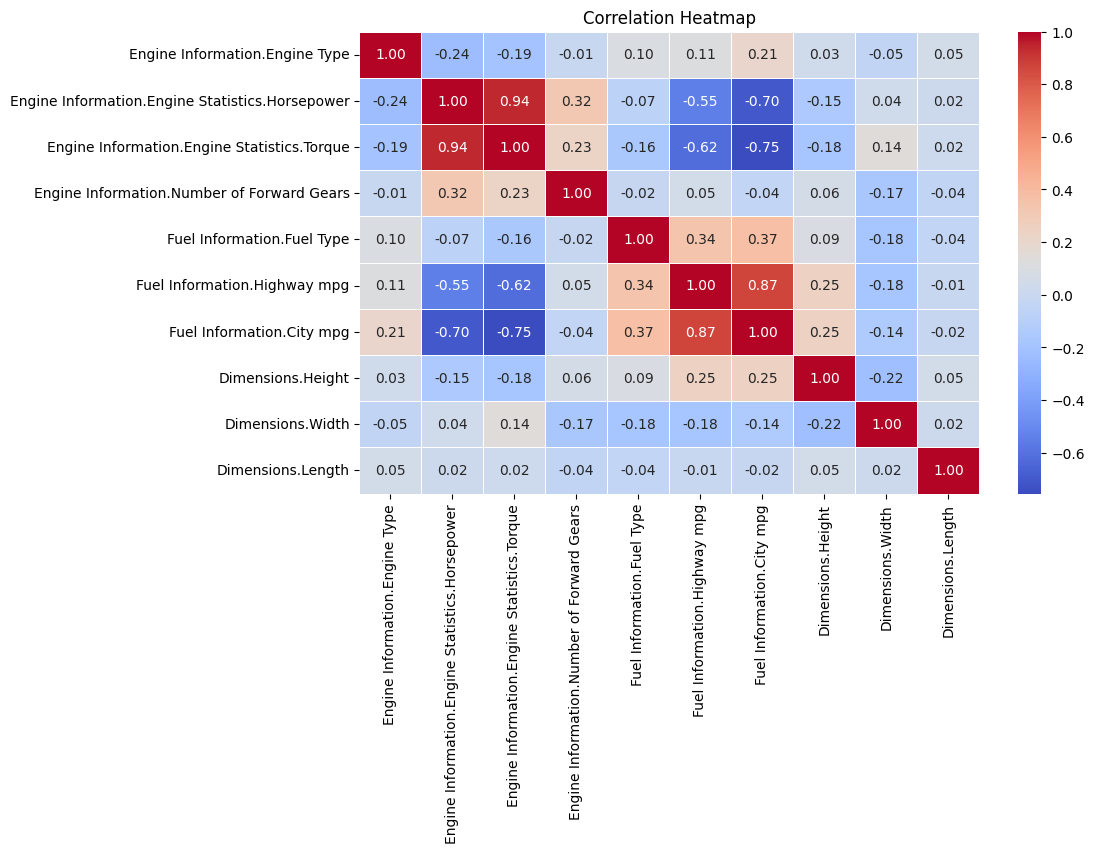

Variance Inflation Factor (VIF) Scores:
                                           Feature        VIF
0                   Engine Information.Engine Type   1.105728
1  Engine Information.Engine Statistics.Horsepower  11.032397
2      Engine Information.Engine Statistics.Torque  11.198253
3       Engine Information.Number of Forward Gears   1.297829
4                       Fuel Information.Fuel Type   1.341164
5                        Fuel Information.City mpg   3.009046
6                                Dimensions.Height   1.116042
7                                 Dimensions.Width   1.186891
8                                Dimensions.Length   1.012697

Top Features Correlated with Highway Mileage:
Fuel Information.City mpg                          0.865587
Engine Information.Engine Statistics.Torque        0.618146
Engine Information.Engine Statistics.Horsepower    0.548498
Fuel Information.Fuel Type                         0.342960
Dimensions.Height                                  0.

<ipython-input-16-476ae23e10ab>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="coolwarm")


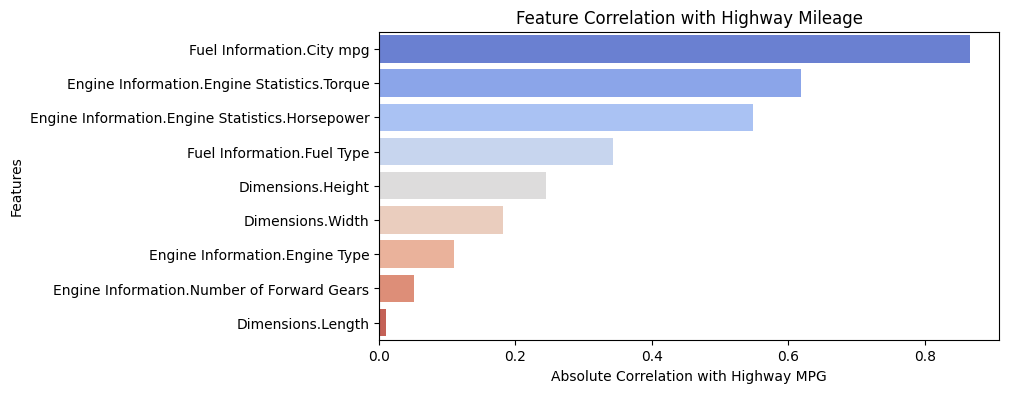

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Selecting relevant columns
features = [
    "Engine Information.Engine Type",
    "Engine Information.Engine Statistics.Horsepower",
    "Engine Information.Engine Statistics.Torque",
    "Engine Information.Number of Forward Gears",
    "Fuel Information.Fuel Type",
    "Fuel Information.Highway mpg",
    "Fuel Information.City mpg",
    "Dimensions.Height",
    "Dimensions.Width",
    "Dimensions.Length",
]

# Drop rows with missing values (if any)
df = df[features].dropna()

# Convert categorical variables into numerical (Label Encoding for simplicity)
categorical_vars = ["Engine Information.Engine Type", "Fuel Information.Fuel Type"]
encoder = LabelEncoder()
for var in categorical_vars:
    df[var] = encoder.fit_transform(df[var])

# Compute correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Compute Variance Inflation Factor (VIF)
X = df.drop(columns=["Fuel Information.Highway mpg"])  # Feature matrix (excluding target)
X["Intercept"] = 1  # Add intercept for VIF calculation

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the intercept row from VIF results
vif_data = vif_data[vif_data["Feature"] != "Intercept"]

# Display VIF scores
print("Variance Inflation Factor (VIF) Scores:")
print(vif_data)

# --- Correlation Analysis ---
# Compute correlation of all features with the target variable
target = "Fuel Information.Highway mpg"
correlation_with_target = corr_matrix[target].drop(target)  # Exclude self-correlation

# Sort features by absolute correlation value (descending order)
correlation_with_target = correlation_with_target.abs().sort_values(ascending=False)

# Display top correlated features
print("\nTop Features Correlated with Highway Mileage:")
print(correlation_with_target)

# Plot correlation with target
plt.figure(figsize=(8, 4))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="coolwarm")
plt.xlabel("Absolute Correlation with Highway MPG")
plt.ylabel("Features")
plt.title("Feature Correlation with Highway Mileage")
plt.show()


## Feature Selection
The selection of the final features—"Fuel Information.City mpg", "Engine Information.Engine Statistics.Torque", "Dimensions.Height", and "Dimensions.Width"—is based on their correlation strength with the target variable, "Fuel Information.Highway mpg". Here’s why these features were chosen:

1. "Fuel Information.City mpg" (Correlation: 0.865587)

This has the strongest correlation with the target variable, meaning city fuel efficiency is highly predictive of highway fuel efficiency.
Makes sense intuitively, as cars that perform well in city conditions generally also perform well on highways.
2. "Engine Information.Engine Statistics.Torque" (Correlation: 0.618146)

This has a moderate positive correlation with highway MPG, indicating that torque impacts fuel efficiency.
A higher torque may contribute to better acceleration and efficiency at highway speeds.
3. "Dimensions.Height" (Correlation: 0.245232) and "Dimensions.Width" (Correlation: 0.181251)

These features have lower but still relevant correlations, suggesting that a car’s aerodynamics and size influence its fuel efficiency.
Larger, taller cars often have higher air resistance, which could negatively impact highway MPG.
## Why Not Include Other Features?


1. "Engine Information.Engine Statistics.Horsepower" (0.548498): Stronger correlation but highly related to torque (potential collinearity).
2. "Fuel Information.Fuel Type" (0.342960): Not as strong as other selected features.
3. "Engine Information.Engine Type" (0.110483) & "Number of Forward Gears" (0.051960): Weak correlation, adding little predictive power.
4. "Dimensions.Length" (0.010108): Almost no correlation, so including it would add noise rather than improve predictions.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor




# Define target and selected features
target = "Fuel Information.Highway mpg"
final_features = [
    "Fuel Information.City mpg",
    "Engine Information.Engine Statistics.Torque",
    "Dimensions.Height",
    "Dimensions.Width"
]

# Keep only relevant columns and drop missing values
df_selected = df[[target] + final_features].dropna()

# Calculate Variance Inflation Factor (VIF)
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

X_vif = df_selected[final_features]
vif_result = calculate_vif(X_vif)
print("Variance Inflation Factor (VIF) for each feature:")
print(vif_result)

# Detect outliers using IQR method
Q1 = df_selected.quantile(0.25)
Q3 = df_selected.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_selected[~((df_selected < lower_bound) | (df_selected > upper_bound)).any(axis=1)]

# Train-test split (before removing outliers)
X = df_selected[final_features]
y = df_selected[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train-test split (after removing outliers)
X_clean = df_no_outliers[final_features]
y_clean = df_no_outliers[target]
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Train multiple linear regression model (before outlier removal)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Train multiple linear regression model (after outlier removal)
model_clean = LinearRegression()
model_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = model_clean.predict(X_test_clean)

# Evaluate models
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae_clean = mean_absolute_error(y_test_clean, y_pred_clean)
mse_clean = mean_squared_error(y_test_clean, y_pred_clean)
rmse_clean = np.sqrt(mse_clean)
r2_clean = r2_score(y_test_clean, y_pred_clean)

# Print results
print("Model Evaluation Before Outlier Removal:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.3f}")

print("\nModel Evaluation After Outlier Removal:")
print(f"MAE: {mae_clean:.2f}")
print(f"MSE: {mse_clean:.2f}")
print(f"RMSE: {rmse_clean:.2f}")
print(f"R-squared: {r2_clean:.3f}")


Variance Inflation Factor (VIF) for each feature:
                                       Feature       VIF
0                    Fuel Information.City mpg  8.276122
1  Engine Information.Engine Statistics.Torque  5.122950
2                            Dimensions.Height  6.962771
3                             Dimensions.Width  4.279339
Model Evaluation Before Outlier Removal:
MAE: 1.23
MSE: 2.83
RMSE: 1.68
R-squared: 0.919

Model Evaluation After Outlier Removal:
MAE: 1.18
MSE: 2.44
RMSE: 1.56
R-squared: 0.926
